# DATASET 1
## Dataset 1: online_gaming_behavior_dataset.csv
### M·ª•c ƒë√≠ch s·ª≠ d·ª•ng:
ƒê√¢y l√† b·ªô d·ªØ li·ªáu g·ªëc v√† ƒë·∫ßy ƒë·ªß, ƒë∆∞·ª£c s·ª≠ d·ª•ng l√†m t·∫≠p hu·∫•n luy·ªán ch√≠nh ƒë·ªÉ:
Kh√°m ph√° h√†nh vi ch∆°i game tr·ª±c tuy·∫øn
Ph√¢n t√≠ch m·ªëi quan h·ªá gi·ªØa c√°c y·∫øu t·ªë nh∆∞ gi·ªõi t√≠nh, th·ªùi gian ch∆°i, th·ªÉ lo·∫°i game,...
Hu·∫•n luy·ªán m√¥ h√¨nh h·ªçc m√°y ƒë·ªÉ d·ª± ƒëo√°n m·ª©c ƒë·ªô g·∫Øn b√≥ (engagement)
### C√°ch x·ª≠ l√Ω:
Ki·ªÉm tra v√† x·ª≠ l√Ω missing values b·∫±ng:
+ median cho bi·∫øn s·ªë
+ mode cho bi·∫øn ph√¢n lo·∫°i
M√£ h√≥a c√°c bi·∫øn ph√¢n lo·∫°i b·∫±ng LabelEncoder
Chia t·∫≠p train/test theo t·ªâ l·ªá 80/20 v√† hu·∫•n luy·ªán m√¥ h√¨nh Random Forest

# Project 10: Predict Online Gaming Behavior

## Objective
Exploring patterns in online gaming behavior, developing machine learning models for player engagement prediction, and conducting research in gaming analytics.

## Todo works:
- Predictive modeling of player retention and engagement patterns
- Analysis of factors influencing player behavior and game performance  
- Optimization of game design, marketing strategies, and player experience enhancements

## Dataset
Using the online gaming behavior dataset from Kaggle to analyze and predict player engagement levels.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


In [2]:
# Load the dataset
df = pd.read_csv('Dataset/online_gaming_behavior_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
df.head()


Dataset Shape: (40034, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: f

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                    25          Medium  
1                    10          Medium  
2                    41            High  
3                    47          Medium  
4                    37          Medium

In [3]:
# Statistical summary
print("Statistical Summary:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique values in categorical columns:")
categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}: {df[col].unique()}")
        print(f"Value counts for {col}:")
        print(df[col].value_counts())


Statistical Summary:
           PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531      12.024365         0.200854   
std    11556.964675     10.043227       6.914638         0.400644   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19008.250000     23.000000       6.067501         0.000000   
50%    29016.500000     32.000000      12.008002         0.000000   
75%    39024.750000     41.000000      17.963831         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.000000

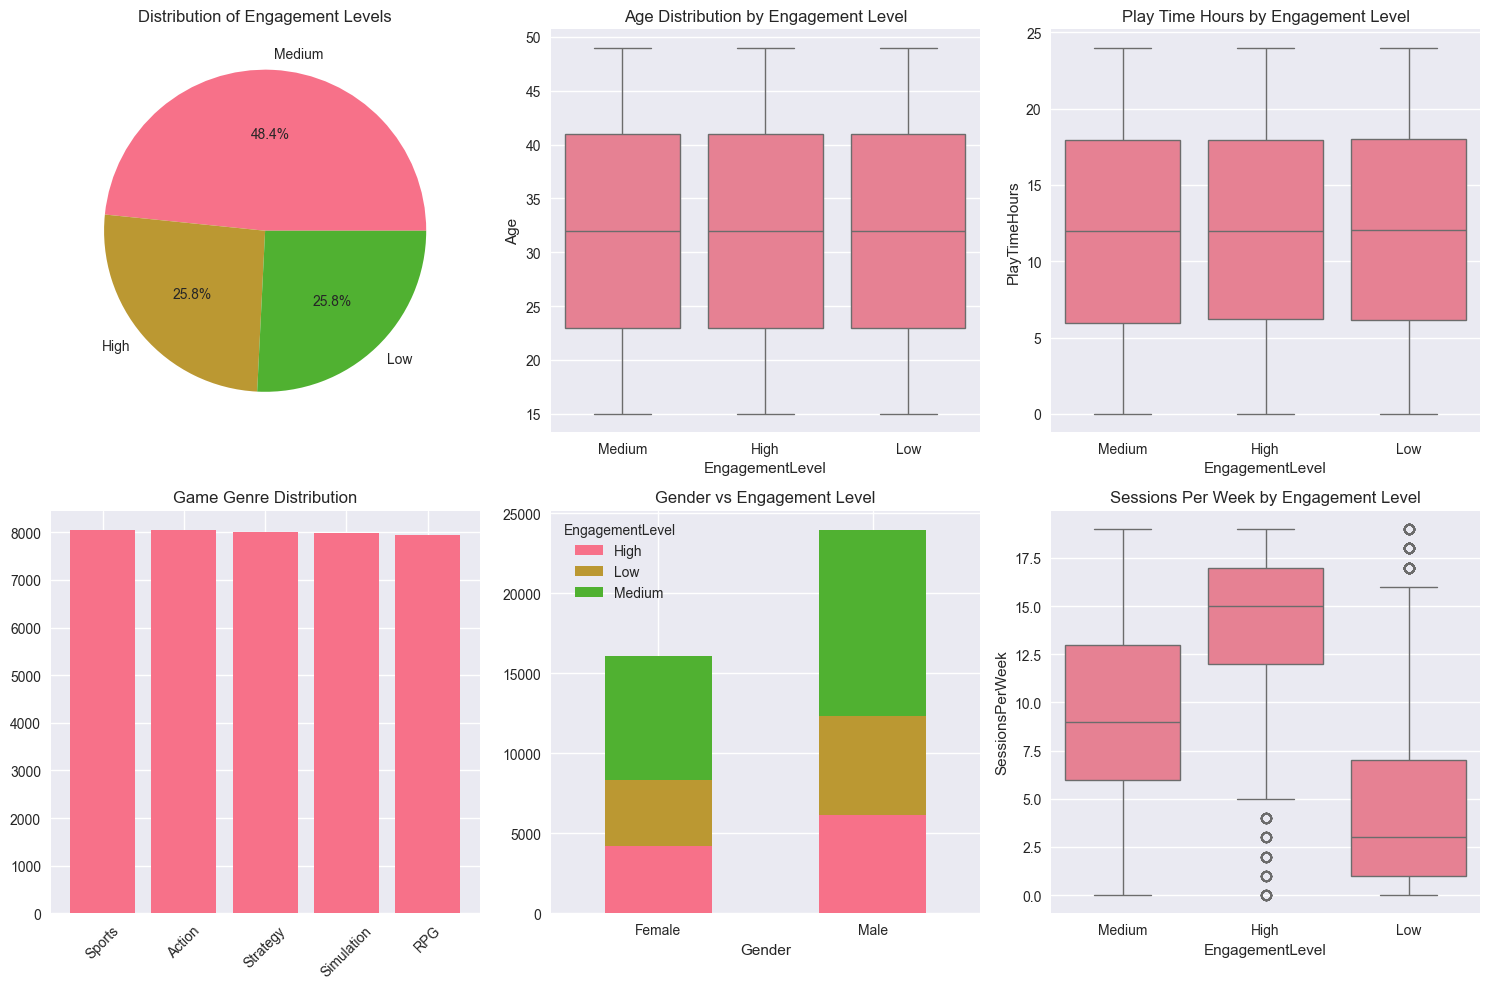

In [4]:
# Distribution of Engagement Level (Target Variable)
plt.figure(figsize=(15, 10))

# Engagement Level Distribution
plt.subplot(2, 3, 1)
engagement_counts = df['EngagementLevel'].value_counts()
plt.pie(engagement_counts.values, labels=engagement_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Engagement Levels')

# Age Distribution by Engagement Level
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='EngagementLevel', y='Age')
plt.title('Age Distribution by Engagement Level')

# Play Time Hours by Engagement Level
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='EngagementLevel', y='PlayTimeHours')
plt.title('Play Time Hours by Engagement Level')

# Game Genre Distribution
plt.subplot(2, 3 , 4)
genre_counts = df
-√¥piut['GameGenre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Game Genre Distribution')
plt.xticks(rotation=45)

# Gender vs Engagement Level
plt.subplot(2, 3, 5)
gender_engagement = pd.crosstab(df['Gender'], df['EngagementLevel'])
gender_engagement.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Gender vs Engagement Level')
plt.xticks(rotation=0)

# Sessions Per Week by Engagement Level
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='EngagementLevel', y='SessionsPerWeek')
plt.title('Sessions Per Week by Engagement Level')

plt.tight_layout()
plt.show()


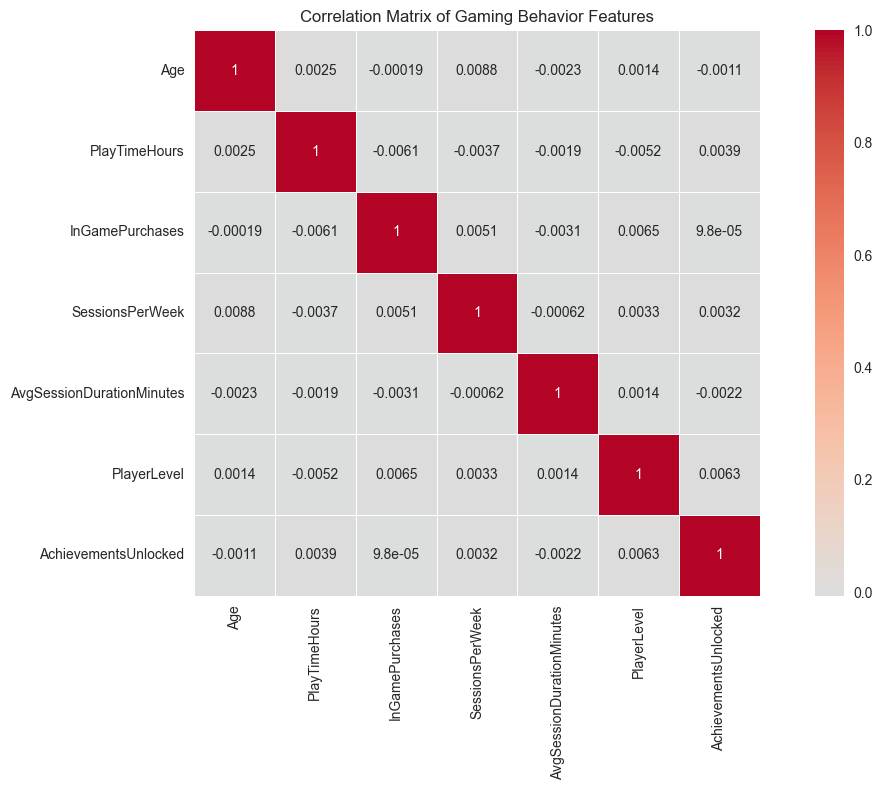

Strong correlations (|r| > 0.5):


In [5]:
# Correlation Analysis
plt.figure(figsize=(12, 8))

# Select numerical columns for correlation
numerical_cols = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 
                  'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

# Create correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Gaming Behavior Features')
plt.tight_layout()
plt.show()

# Additional insights
print("Strong correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")


In [6]:
# Create a copy of the dataset for preprocessing
df_processed = df.copy()

# Remove PlayerID as it's just an identifier
df_processed = df_processed.drop('PlayerID', axis=1)

# Label encode categorical variables
label_encoders = {}
categorical_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

for feature in categorical_features:
    le = LabelEncoder()
    df_processed[feature + '_encoded'] = le.fit_transform(df_processed[feature])
    label_encoders[feature] = le
    print(f"{feature} encoding mapping:")
    for i, label in enumerate(le.classes_):
        print(f"  {label}: {i}")
    print()

# Encode target variable (EngagementLevel)
target_encoder = LabelEncoder()
df_processed['EngagementLevel_encoded'] = target_encoder.fit_transform(df_processed['EngagementLevel'])

print("Target variable encoding:")
for i, label in enumerate(target_encoder.classes_):
    print(f"  {label}: {i}")

# Select features for modeling
feature_columns = (['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 
                   'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'] + 
                  [f + '_encoded' for f in categorical_features])

X = df_processed[feature_columns]
y = df_processed['EngagementLevel_encoded']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures used: {feature_columns}")


Gender encoding mapping:
  Female: 0
  Male: 1

Location encoding mapping:
  Asia: 0
  Europe: 1
  Other: 2
  USA: 3

GameGenre encoding mapping:
  Action: 0
  RPG: 1
  Simulation: 2
  Sports: 3
  Strategy: 4

GameDifficulty encoding mapping:
  Easy: 0
  Hard: 1
  Medium: 2

Target variable encoding:
  High: 0
  Low: 1
  Medium: 2

Feature matrix shape: (40034, 11)
Target vector shape: (40034,)

Features used: ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked', 'Gender_encoded', 'Location_encoded', 'GameGenre_encoded', 'GameDifficulty_encoded']


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\nTesting target distribution:")
print(pd.Series(y_test).value_counts().sort_index())


Training set shape: (32027, 11)
Testing set shape: (8007, 11)
Training target distribution:
EngagementLevel_encoded
0     8269
1     8259
2    15499
Name: count, dtype: int64

Testing target distribution:
EngagementLevel_encoded
0    2067
1    2065
2    3875
Name: count, dtype: int64


In [8]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1
)

# Train the model
print("Training Random Forest Classifier...")
rf_classifier.fit(X_train, y_train)
print("Training completed!")

# Make predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Cross-validation score
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Training Random Forest Classifier...
Training completed!

Model Accuracy: 0.9098
Cross-validation scores: [0.91617234 0.90399625 0.91288056 0.90913349 0.91147541]
Mean CV score: 0.9107 (+/- 0.0081)


Classification Report:
              precision    recall  f1-score   support

        High       0.92      0.87      0.89      2067
         Low       0.91      0.88      0.89      2065
      Medium       0.91      0.95      0.93      3875

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



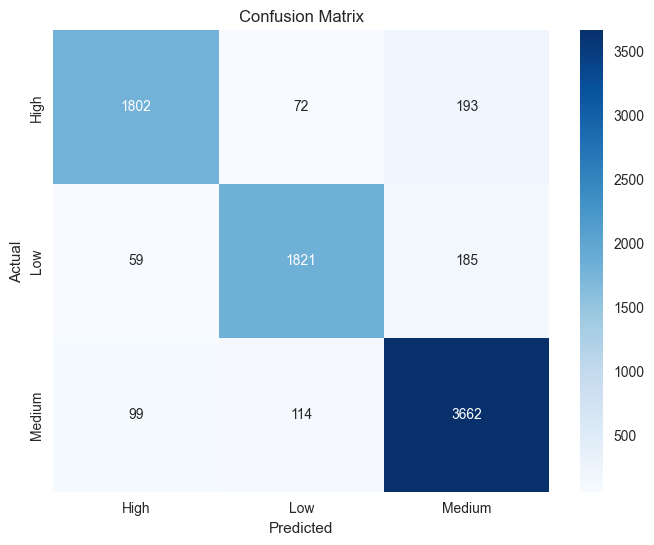

In [9]:
# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_encoder.classes_, 
            yticklabels=target_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Feature Importance Ranking:
                      feature  importance
3             SessionsPerWeek    0.419871
4   AvgSessionDurationMinutes    0.310380
1               PlayTimeHours    0.057187
5                 PlayerLevel    0.056206
6        AchievementsUnlocked    0.051251
0                         Age    0.041923
9           GameGenre_encoded    0.020020
8            Location_encoded    0.015778
10     GameDifficulty_encoded    0.012719
7              Gender_encoded    0.008067
2             InGamePurchases    0.006598


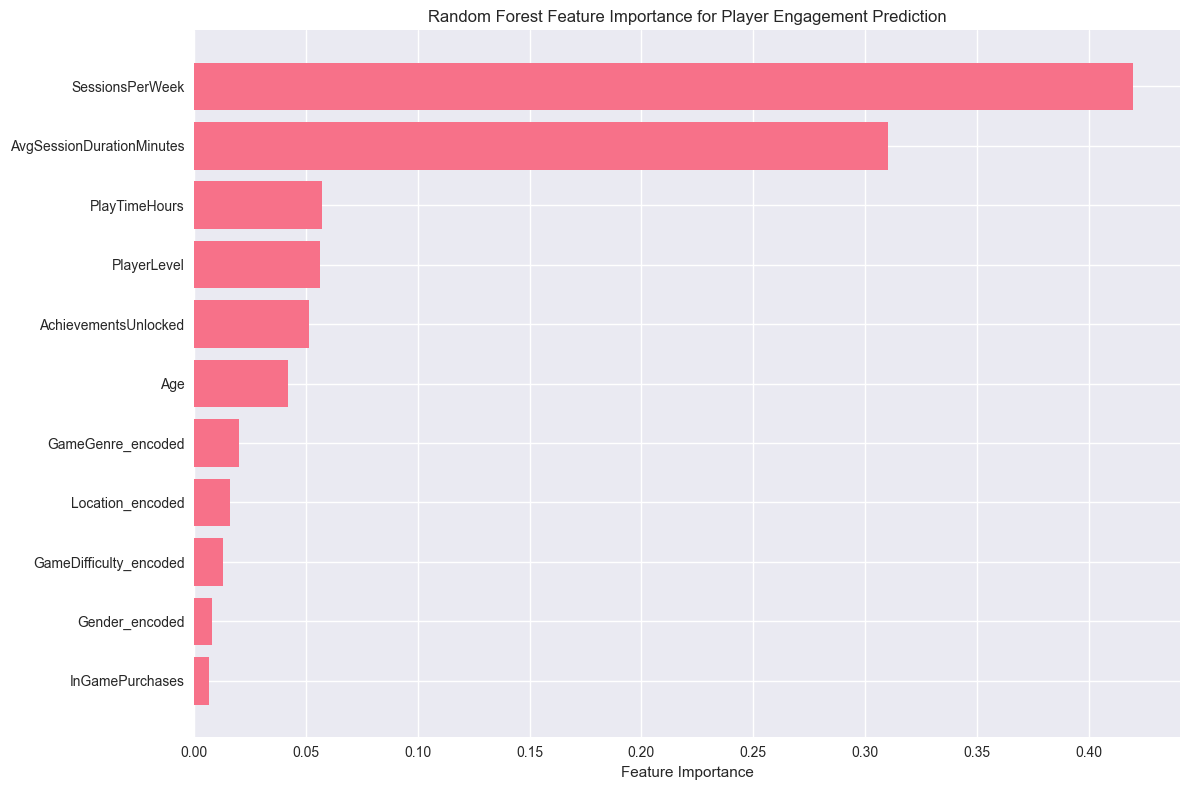


Top 5 Most Important Features:
1. SessionsPerWeek: 0.4199
2. AvgSessionDurationMinutes: 0.3104
3. PlayTimeHours: 0.0572
4. PlayerLevel: 0.0562
5. AchievementsUnlocked: 0.0513


In [10]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance Ranking:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance for Player Engagement Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Top 5 most important features
print(f"\nTop 5 Most Important Features:")
for i, (feature, importance) in enumerate(feature_importance.head().values, 1):
    print(f"{i}. {feature}: {importance:.4f}")


In [11]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
print("Performing hyperparameter tuning...")
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,  # Using 3-fold CV to reduce computation time
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train the best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Improved model accuracy: {accuracy_best:.4f}")
print(f"Improvement: {accuracy_best - accuracy:.4f}")


Performing hyperparameter tuning...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.9109
Improved model accuracy: 0.9092
Improvement: -0.0006


In [12]:
# Advanced Analytics for Gaming Insights

# 1. Player Segmentation Analysis
print("=== PLAYER SEGMENTATION ANALYSIS ===")
segmentation = df.groupby(['EngagementLevel', 'GameGenre']).agg({
    'Age': 'mean',
    'PlayTimeHours': 'mean',
    'SessionsPerWeek': 'mean',
    'PlayerLevel': 'mean',
    'InGamePurchases': 'sum'
}).round(2)

print("Player characteristics by engagement level and game genre:")
print(segmentation)

# 2. Engagement Pattern Analysis
print("\n=== ENGAGEMENT PATTERN ANALYSIS ===")
high_engagement = df[df['EngagementLevel'] == 'High']
medium_engagement = df[df['EngagementLevel'] == 'Medium']
low_engagement = df[df['EngagementLevel'] == 'Low']

print(f"High Engagement Players ({len(high_engagement)} players):")
print(f"  - Average Play Time: {high_engagement['PlayTimeHours'].mean():.2f} hours")
print(f"  - Average Sessions/Week: {high_engagement['SessionsPerWeek'].mean():.2f}")
print(f"  - Average Player Level: {high_engagement['PlayerLevel'].mean():.2f}")
print(f"  - In-Game Purchase Rate: {(high_engagement['InGamePurchases'].sum() / len(high_engagement) * 100):.1f}%")

print(f"\nMedium Engagement Players ({len(medium_engagement)} players):")
print(f"  - Average Play Time: {medium_engagement['PlayTimeHours'].mean():.2f} hours")
print(f"  - Average Sessions/Week: {medium_engagement['SessionsPerWeek'].mean():.2f}")
print(f"  - Average Player Level: {medium_engagement['PlayerLevel'].mean():.2f}")
print(f"  - In-Game Purchase Rate: {(medium_engagement['InGamePurchases'].sum() / len(medium_engagement) * 100):.1f}%")

print(f"\nLow Engagement Players ({len(low_engagement)} players):")
print(f"  - Average Play Time: {low_engagement['PlayTimeHours'].mean():.2f} hours")
print(f"  - Average Sessions/Week: {low_engagement['SessionsPerWeek'].mean():.2f}")
print(f"  - Average Player Level: {low_engagement['PlayerLevel'].mean():.2f}")
print(f"  - In-Game Purchase Rate: {(low_engagement['InGamePurchases'].sum() / len(low_engagement) * 100):.1f}%")


=== PLAYER SEGMENTATION ANALYSIS ===
Player characteristics by engagement level and game genre:
                              Age  PlayTimeHours  SessionsPerWeek  \
EngagementLevel GameGenre                                           
High            Action      32.22          12.17            14.16   
                RPG         31.76          11.75            14.30   
                Simulation  31.81          11.84            14.20   
                Sports      32.15          12.26            14.29   
                Strategy    31.67          12.31            14.32   
Low             Action      31.69          12.35             4.55   
                RPG         31.73          12.17             4.45   
                Simulation  32.08          12.05             4.49   
                Sports      31.95          12.11             4.62   
                Strategy    32.04          11.83             4.54   
Medium          Action      31.95          12.06             9.59   
       

In [13]:
# 3. Business Recommendations Based on Model Insights
print("\n=== BUSINESS RECOMMENDATIONS ===")

# Based on feature importance analysis
top_features = feature_importance.head(3)['feature'].tolist()
print("Based on our Random Forest analysis, the top factors affecting player engagement are:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

print("\n--- STRATEGIC RECOMMENDATIONS ---")

print("\n1. PLAYER RETENTION STRATEGIES:")
print("   ‚Ä¢ Focus on increasing sessions per week for medium/low engagement players")
print("   ‚Ä¢ Develop achievement systems to boost player progression")
print("   ‚Ä¢ Create personalized content based on play time patterns")

print("\n2. GAME DESIGN OPTIMIZATION:")
print("   ‚Ä¢ Balance game difficulty to maintain engagement across all skill levels")
print("   ‚Ä¢ Design genre-specific engagement mechanics")
print("   ‚Ä¢ Implement adaptive session duration recommendations")

print("\n3. MONETIZATION STRATEGIES:")
print("   ‚Ä¢ Target high-engagement players with premium content")
print("   ‚Ä¢ Create value propositions for medium-engagement players")
print("   ‚Ä¢ Design re-engagement campaigns for low-engagement segments")

print("\n4. MARKETING STRATEGIES:")
print("   ‚Ä¢ Segment campaigns by engagement level and game genre")
print("   ‚Ä¢ Focus acquisition on demographics showing high engagement patterns")
print("   ‚Ä¢ Develop retention campaigns for at-risk player segments")

# Risk Analysis
print("\n--- PLAYER CHURN RISK ANALYSIS ---")
risk_indicators = df[(df['SessionsPerWeek'] < 3) & (df['PlayTimeHours'] < 10)]
print(f"Players at high churn risk: {len(risk_indicators)} ({len(risk_indicators)/len(df)*100:.1f}% of total)")
print("Characteristics of at-risk players:")
print(risk_indicators.groupby('GameGenre')['EngagementLevel'].value_counts())



=== BUSINESS RECOMMENDATIONS ===
Based on our Random Forest analysis, the top factors affecting player engagement are:
1. SessionsPerWeek
2. AvgSessionDurationMinutes
3. PlayTimeHours

--- STRATEGIC RECOMMENDATIONS ---

1. PLAYER RETENTION STRATEGIES:
   ‚Ä¢ Focus on increasing sessions per week for medium/low engagement players
   ‚Ä¢ Develop achievement systems to boost player progression
   ‚Ä¢ Create personalized content based on play time patterns

2. GAME DESIGN OPTIMIZATION:
   ‚Ä¢ Balance game difficulty to maintain engagement across all skill levels
   ‚Ä¢ Design genre-specific engagement mechanics
   ‚Ä¢ Implement adaptive session duration recommendations

3. MONETIZATION STRATEGIES:
   ‚Ä¢ Target high-engagement players with premium content
   ‚Ä¢ Create value propositions for medium-engagement players
   ‚Ä¢ Design re-engagement campaigns for low-engagement segments

4. MARKETING STRATEGIES:
   ‚Ä¢ Segment campaigns by engagement level and game genre
   ‚Ä¢ Focus acquisiti

In [14]:
def predict_player_engagement(age, play_time_hours, in_game_purchases, sessions_per_week,
                               avg_session_duration, player_level, achievements_unlocked,
                               gender, location, game_genre, game_difficulty):
    """
    Predict player engagement level based on gaming behavior characteristics.
    
    Parameters:
    - age: Player's age
    - play_time_hours: Total hours played
    - in_game_purchases: Number of in-game purchases (0 or 1)
    - sessions_per_week: Average sessions per week
    - avg_session_duration: Average session duration in minutes
    - player_level: Current player level
    - achievements_unlocked: Number of achievements unlocked
    - gender: 'Male' or 'Female'
    - location: 'Asia', 'Europe', 'USA', or 'Other'
    - game_genre: 'Action', 'RPG', 'Simulation', 'Sports', or 'Strategy'
    - game_difficulty: 'Easy', 'Medium', or 'Hard'
    
    Returns:
    - Predicted engagement level and probability
    """
    
    # Encode categorical variables
    gender_encoded = label_encoders['Gender'].transform([gender])[0]
    location_encoded = label_encoders['Location'].transform([location])[0]
    genre_encoded = label_encoders['GameGenre'].transform([game_genre])[0]
    difficulty_encoded = label_encoders['GameDifficulty'].transform([game_difficulty])[0]
    
    # Create feature vector
    features = np.array([[age, play_time_hours, in_game_purchases, sessions_per_week,
                         avg_session_duration, player_level, achievements_unlocked,
                         gender_encoded, location_encoded, genre_encoded, difficulty_encoded]])
    
    # Make prediction
    prediction = best_rf.predict(features)[0]
    probability = best_rf.predict_proba(features)[0]
    
    # Convert back to engagement level
    engagement_level = target_encoder.inverse_transform([prediction])[0]
    
    return {
        'predicted_engagement': engagement_level,
        'probabilities': {
            'High': probability[0],
            'Low': probability[1], 
            'Medium': probability[2]
        }
    }

# Example prediction
print("=== EXAMPLE PREDICTION ===")
example_prediction = predict_player_engagement(
    age=25,
    play_time_hours=15.5,
    in_game_purchases=1,
    sessions_per_week=8,
    avg_session_duration=120,
    player_level=45,
    achievements_unlocked=30,
    gender='Male',
    location='USA',
    game_genre='Action',
    game_difficulty='Medium'
)

print(f"Predicted Engagement Level: {example_prediction['predicted_engagement']}")
print("Engagement Probabilities:")
for level, prob in example_prediction['probabilities'].items():
    print(f"  {level}: {prob:.3f}")


=== EXAMPLE PREDICTION ===
Predicted Engagement Level: Medium
Engagement Probabilities:
  High: 0.096
  Low: 0.072
  Medium: 0.832


# DATASET 2
## Dataset 2: online_gaming_behavior_dirty_200.csv
### M·ª•c ƒë√≠ch s·ª≠ d·ª•ng:
ƒê√¢y l√† t·∫≠p d·ªØ li·ªáu gi·∫£ l·∫≠p t√¨nh hu·ªëng th·ª±c t·∫ø, ch·ª©a nhi·ªÅu l·ªói ph·ªï bi·∫øn nh∆∞:
Thi·∫øu d·ªØ li·ªáu (missing values)
M·∫•t c√¢n b·∫±ng nh√£n
Nhi·ªÖu ho·∫∑c ƒë·ªãnh d·∫°ng ch∆∞a chu·∫©n
Dataset n√†y ƒë∆∞·ª£c d√πng ƒë·ªÉ:
- Ki·ªÉm tra ƒë·ªô b·ªÅn v√† kh·∫£ nƒÉng t·ªïng qu√°t h√≥a c·ªßa m√¥ h√¨nh
- ƒê√°nh gi√° quy tr√¨nh l√†m s·∫°ch v√† d·ª± ƒëo√°n c√≥ th·ªÉ √°p d·ª•ng trong ƒëi·ªÅu ki·ªán th·ª±c t·∫ø kh√¥ng ho√†n h·∫£o
- So s√°nh k·∫øt qu·∫£ m√¥ h√¨nh gi·ªØa d·ªØ li·ªáu s·∫°ch v√† d·ªØ li·ªáu b·∫©n
### C√°ch x·ª≠ l√Ω:
- L√†m s·∫°ch t∆∞∆°ng t·ª± nh∆∞ dataset 1 (median/mode + LabelEncoder)
- D·ª± ƒëo√°n b·∫±ng m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán t·ª´ dataset 1 (kh√¥ng retrain)
- ƒê√°nh gi√° hi·ªáu su·∫•t qua c√°c ch·ªâ s·ªë: precision, recall, f1-score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ƒê·ªçc file
df = pd.read_csv("Dataset/online_gaming_behavior_dirty_200.csv")

# Hi·ªÉn th·ªã k√≠ch th∆∞·ªõc & 5 d√≤ng ƒë·∫ßu
print("Shape:", df.shape)
df.head()

Shape: (200, 13)


PlayerID  Age  Gender Location  GameGenre PlayTimeHours InGamePurchases  \
0      9000   43    male     Asia     Action          21.5               2   
1      9001  NaN    Male      NaN     Action        -17.66             104   
2      9002   67  FEMALE       VN        NaN         37.05               3   
3      9003   61    male    Other  Adventure         29.68            1005   
4      9004   61  FEMALE    Other     Puzzle        118.59               2   

  GameDifficulty SessionsPerWeek AvgSessionDurationMinutes PlayerLevel  \
0           easy             18a                        74          29   
1           Easy               5                        30          19   
2           HARD               8                       110          24   
3           Easy               9                       125          93   
4        Unknown              14                       378         31a   

  AchievementsUnlocked EngagementLevel  
0                   34            HIGH  
1                   18          Medium  
2                   11          Medium  
3                   49          MEDIUM  
4                   18             Low

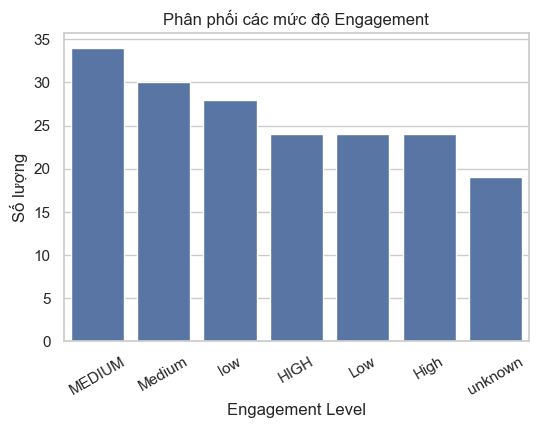

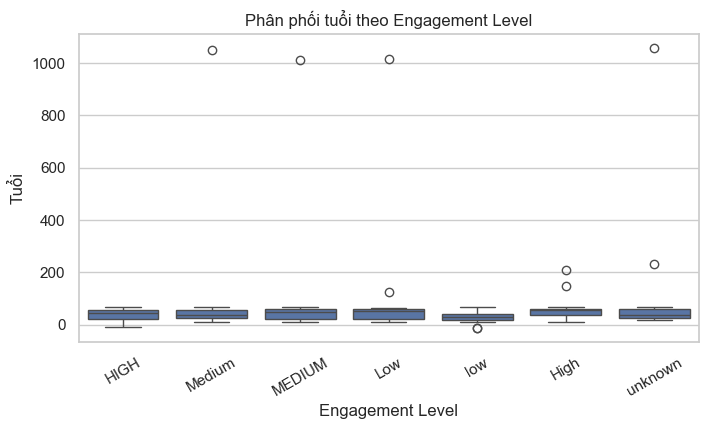

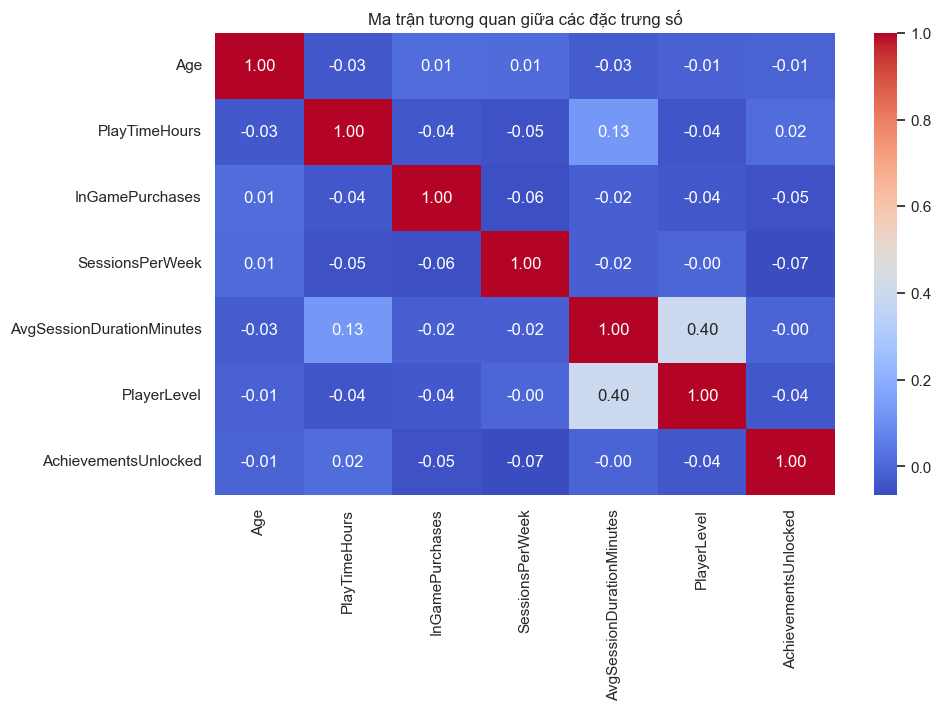

In [2]:
# C√†i ƒë·∫∑t hi·ªÉn th·ªã
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# üëÅÔ∏è 1. Ph√¢n ph·ªëi c·ªßa bi·∫øn m·ª•c ti√™u: EngagementLevel
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='EngagementLevel', order=df['EngagementLevel'].value_counts().index)
plt.title("Ph√¢n ph·ªëi c√°c m·ª©c ƒë·ªô Engagement")
plt.xlabel("Engagement Level")
plt.ylabel("S·ªë l∆∞·ª£ng")
plt.xticks(rotation=30)
plt.show()

# üëÅÔ∏è 2. Boxplot: Age theo EngagementLevel
df_plot = df[['EngagementLevel', 'Age']].copy()
df_plot['Age'] = pd.to_numeric(df_plot['Age'], errors='coerce')
df_plot = df_plot.dropna()

plt.figure(figsize=(8, 4))
sns.boxplot(data=df_plot, x='EngagementLevel', y='Age')
plt.title("Ph√¢n ph·ªëi tu·ªïi theo Engagement Level")
plt.xlabel("Engagement Level")
plt.ylabel("Tu·ªïi")
plt.xticks(rotation=30)
plt.show()

# üëÅÔ∏è 3. T∆∞∆°ng quan gi·ªØa c√°c ƒë·∫∑c tr∆∞ng s·ªë
num_cols = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek',
            'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

# √âp ki·ªÉu s·ªë ƒë·ªÉ tr√°nh l·ªói
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# V·∫Ω heatmap t∆∞∆°ng quan
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c ƒë·∫∑c tr∆∞ng s·ªë")
plt.show()

In [5]:
# üë£ L√†m s·∫°ch c·ªôt Age
def clean_age(val):
    try:
        val = str(val).strip().lower()
        if val == 'm∆∞·ªùi': return 10
        if val.endswith('a'): return int(val[:-1])  # v√≠ d·ª•: "22a" ‚Üí 22
        val = int(val)
        if val < 5 or val > 100: return np.nan      # lo·∫°i b·ªè gi√° tr·ªã kh√¥ng h·ª£p l√Ω
        return val
    except:
        return np.nan

df['Age'] = df['Age'].apply(clean_age)

# üë£ Danh s√°ch c·ªôt s·ªë c·∫ßn √©p ki·ªÉu
numeric_cols = ['PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek',
                'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # l·ªói s·∫Ω tr·ªü th√†nh NaN

# üë£ Chu·∫©n h√≥a vƒÉn b·∫£n cho c√°c c·ªôt ph√¢n lo·∫°i
df['Gender'] = df['Gender'].astype(str).str.strip().str.capitalize()
df['GameGenre'] = df['GameGenre'].astype(str).str.strip().str.capitalize()
df['GameDifficulty'] = df['GameDifficulty'].astype(str).str.strip().str.capitalize()
df['EngagementLevel'] = df['EngagementLevel'].astype(str).str.strip().str.capitalize()

# üë£ ƒêi·ªÅn missing values

# C·ªôt s·ªë ‚Üí ƒëi·ªÅn median
df['Age'] = df['Age'].fillna(df['Age'].median())
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# C·ªôt ph√¢n lo·∫°i ‚Üí ƒëi·ªÅn mode
categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# üë£ N·∫øu c√≤n c·ªôt kh√¥ng c·∫ßn thi·∫øt, b·∫°n c√≥ th·ªÉ x√≥a (tu·ª≥ ch·ªçn)
if 'PlayerID' in df.columns:
    df = df.drop(columns=['PlayerID'])

# üë£ Ki·ªÉm tra l·∫°i sau x·ª≠ l√Ω
print("‚úÖ Sau l√†m s·∫°ch:")
print(df.info())
print("S·ªë d√≤ng c√≤n NaN:", df.isnull().sum().sum())


‚úÖ Sau l√†m s·∫°ch:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        0 non-null      float64
 1   Gender                     200 non-null    object 
 2   Location                   200 non-null    object 
 3   GameGenre                  200 non-null    object 
 4   PlayTimeHours              200 non-null    float64
 5   InGamePurchases            200 non-null    float64
 6   GameDifficulty             200 non-null    object 
 7   SessionsPerWeek            200 non-null    float64
 8   AvgSessionDurationMinutes  200 non-null    float64
 9   PlayerLevel                200 non-null    float64
 10  AchievementsUnlocked       200 non-null    float64
 11  EngagementLevel            200 non-null    object 
dtypes: float64(7), object(5)
memory usage: 18.9+ KB
None
S·ªë d√≤ng c√≤n NaN: 200


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# üë£ 1. Encode c√°c c·ªôt ph√¢n lo·∫°i
label_encoders = {}
categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# üë£ 2. Encode bi·∫øn m·ª•c ti√™u (EngagementLevel)
target_le = LabelEncoder()
df['EngagementLevel'] = target_le.fit_transform(df['EngagementLevel'])

# üë£ 3. T√°ch X v√† y
X = df.drop('EngagementLevel', axis=1)
y = df['EngagementLevel']

# üë£ 4. X·ª≠ l√Ω NaN, inf & lo·∫°i d√≤ng b·∫•t th∆∞·ªùng

# B·∫Øt bu·ªôc ki·ªÉu s·ªë
X = X.apply(pd.to_numeric, errors='coerce')

# Thay th·∫ø inf b·∫±ng NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# X√≥a c√°c c·ªôt c√≥ ph∆∞∆°ng sai = 0 (g√¢y chia 0 trong scaler)
X = X.loc[:, X.std(skipna=True) > 0]

# In th√¥ng tin k·ªπ
print("üîç Tr∆∞·ªõc khi x·ª≠ l√Ω: NaN =", X.isnull().sum().sum(), "| Inf =", np.isinf(X.values).sum())

# Lo·∫°i ho√†n to√†n d√≤ng c√≤n NaN
valid_rows = X.dropna().index
X = X.loc[valid_rows]
y = y.loc[valid_rows]

# Ki·ªÉm tra l·∫ßn cu·ªëi
print("‚úÖ Sau x·ª≠ l√Ω: X.shape =", X.shape, "| NaN =", X.isnull().sum().sum())

# üë£ 5. Chu·∫©n h√≥a an to√†n
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# üë£ 6. Chia t·∫≠p train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("üéØ D·ªØ li·ªáu ƒë√£ s·∫µn s√†ng ƒë·ªÉ hu·∫•n luy·ªán. Train size:", X_train.shape[0], "Test size:", X_test.shape[0])

üîç Tr∆∞·ªõc khi x·ª≠ l√Ω: NaN = 0 | Inf = 0
‚úÖ Sau x·ª≠ l√Ω: X.shape = (200, 10) | NaN = 0
üéØ D·ªØ li·ªáu ƒë√£ s·∫µn s√†ng ƒë·ªÉ hu·∫•n luy·ªán. Train size: 160 Test size: 40


üéØ Accuracy: 47.50%

üìã Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.40      0.36        10
         Low       0.64      0.54      0.58        13
      Medium       0.50      0.64      0.56        11
         Nan       0.00      0.00      0.00         4
     Unknown       1.00      0.50      0.67         2

    accuracy                           0.47        40
   macro avg       0.49      0.41      0.43        40
weighted avg       0.48      0.47      0.47        40



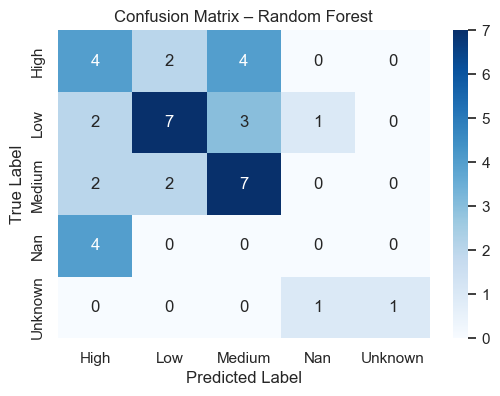

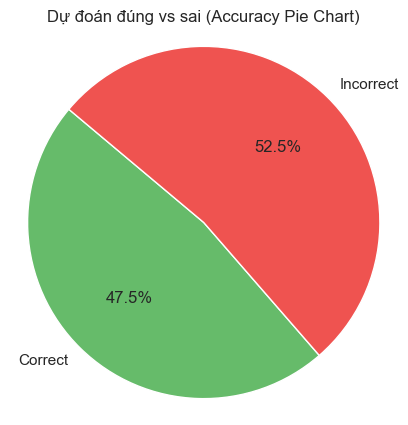

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# üë£ 1. Hu·∫•n luy·ªán m√¥ h√¨nh
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# üë£ 2. D·ª± ƒëo√°n
y_pred = model.predict(X_test)

# üë£ 3. T√™n c√°c l·ªõp m·ª•c ti√™u (chuy·ªÉn sang chu·ªói)
class_labels = [str(label) for label in target_le.classes_]

# üë£ 4. ƒê√°nh gi√° hi·ªáu su·∫•t
acc = accuracy_score(y_test, y_pred)
print(f"üéØ Accuracy: {acc:.2%}\n")

print("üìã Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels, zero_division=0))

# üë£ 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix ‚Äì Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# üë£ 6. Tr·ª±c quan h√≥a Accuracy vs Error
labels = ['Correct', 'Incorrect']
values = [sum(y_pred == y_test), sum(y_pred != y_test)]
colors = ['#66BB6A', '#EF5350']

plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("D·ª± ƒëo√°n ƒë√∫ng vs sai (Accuracy Pie Chart)")
plt.axis('equal')
plt.show()


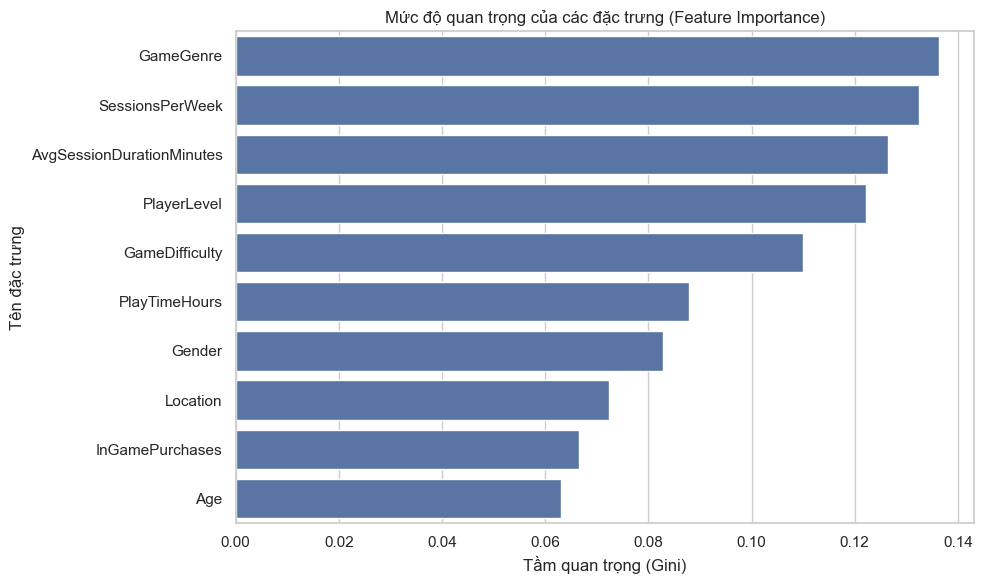

In [11]:
# üë£ 1. L·∫•y ƒë·ªô quan tr·ªçng c·ªßa c√°c ƒë·∫∑c tr∆∞ng
importances = model.feature_importances_

# üë£ 2. T√™n c√°c ƒë·∫∑c tr∆∞ng
feature_names = df.drop(columns=['EngagementLevel']).columns

# üë£ 3. S·∫Øp x·∫øp theo ƒë·ªô quan tr·ªçng gi·∫£m d·∫ßn
indices = np.argsort(importances)[::-1]

# üë£ 4. Tr·ª±c quan h√≥a Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("M·ª©c ƒë·ªô quan tr·ªçng c·ªßa c√°c ƒë·∫∑c tr∆∞ng (Feature Importance)")
plt.xlabel("T·∫ßm quan tr·ªçng (Gini)")
plt.ylabel("T√™n ƒë·∫∑c tr∆∞ng")
plt.tight_layout()
plt.show()

üéØ Retention Accuracy: 1.0
              precision    recall  f1-score   support

Not Retained       1.00      1.00      1.00         7
    Retained       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



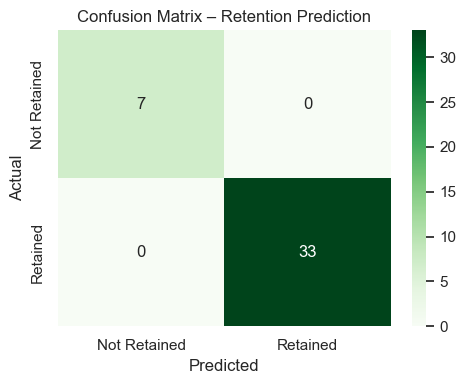

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# üéØ 1. T·∫°o nh√£n Retention
df_retention = df.copy()
df_retention['Retained'] = ((df_retention['SessionsPerWeek'] >= 10) | 
                             (df_retention['PlayTimeHours'] >= 20)).astype(int)

# üîÅ 2. X v√† y cho b√†i to√°n retention
X_ret = df_retention.drop(columns=['EngagementLevel', 'Retained'])
y_ret = df_retention['Retained']

# üßº 3. L√†m s·∫°ch: √©p ki·ªÉu, x·ª≠ l√Ω NaN, lo·∫°i Inf
X_ret = X_ret.apply(pd.to_numeric, errors='coerce')
X_ret = X_ret.replace([np.inf, -np.inf], np.nan)
X_ret = X_ret.fillna(X_ret.median(numeric_only=True))

# üß™ 4. Lo·∫°i b·ªè c√°c c·ªôt c√≥ ph∆∞∆°ng sai = 0 (to√†n 1 gi√° tr·ªã g√¢y l·ªói chia 0)
stds = X_ret.std(numeric_only=True)
cols_to_keep = stds[stds > 0].index
X_ret = X_ret[cols_to_keep]

# üîÑ 5. Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_ret_scaled = scaler.fit_transform(X_ret)

# üì¶ 6. T√°ch t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm th·ª≠
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_ret_scaled, y_ret, test_size=0.2, random_state=42)

# ü§ñ 7. Hu·∫•n luy·ªán m√¥ h√¨nh
rf_ret = RandomForestClassifier(random_state=42)
rf_ret.fit(Xr_train, yr_train)
yr_pred = rf_ret.predict(Xr_test)

# üìä 8. ƒê√°nh gi√° m√¥ h√¨nh
print("üéØ Retention Accuracy:", accuracy_score(yr_test, yr_pred))
print(classification_report(yr_test, yr_pred, target_names=["Not Retained", "Retained"], zero_division=0))

# üìà 9. V·∫Ω confusion matrix
cm = confusion_matrix(yr_test, yr_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Not Retained", "Retained"],
            yticklabels=["Not Retained", "Retained"])
plt.title("Confusion Matrix ‚Äì Retention Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


üìä So s√°nh s·ªë l∆∞·ª£ng gi√° tr·ªã thi·∫øu gi·ªØa 2 dataset:


Dataset1_Missing  Dataset2_Missing
PlayerID                                  0                 0
Age                                       0                 5
Gender                                    0                29
Location                                  0                22
GameGenre                                 0                26
PlayTimeHours                             0                 4
InGamePurchases                           0                12
GameDifficulty                            0                38
SessionsPerWeek                           0                 5
AvgSessionDurationMinutes                 0                 6
PlayerLevel                               0                 3
AchievementsUnlocked                      0                 3
EngagementLevel                           0                17

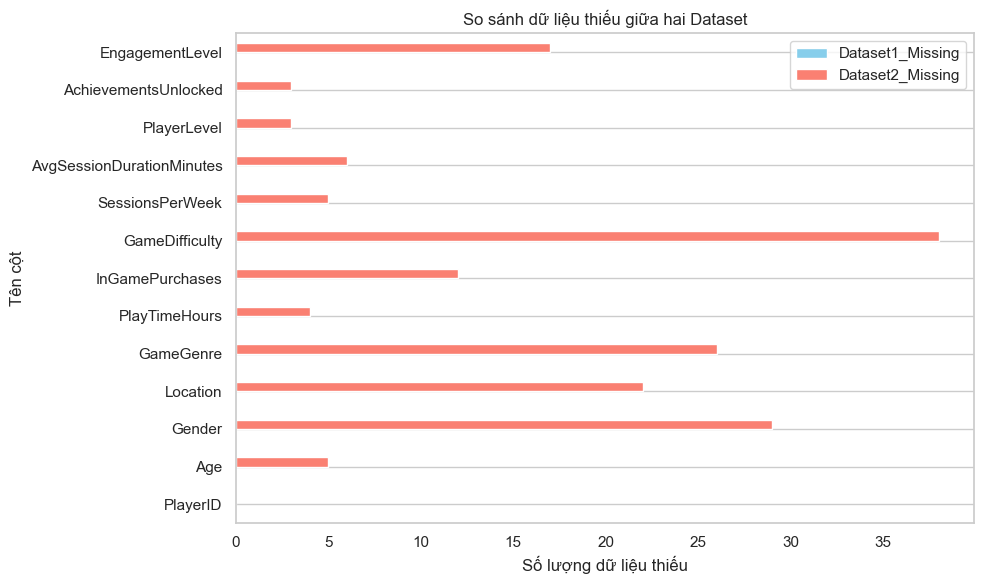

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load d·ªØ li·ªáu
df1 = pd.read_csv("Dataset/online_gaming_behavior_dataset.csv")
df2 = pd.read_csv("Dataset/online_gaming_behavior_dirty_200.csv")

# So s√°nh d·ªØ li·ªáu thi·∫øu
missing_df1 = df1.isnull().sum()
missing_df2 = df2.isnull().sum()

compare_missing = pd.DataFrame({
    "Dataset1_Missing": missing_df1,
    "Dataset2_Missing": missing_df2
})

print("üìä So s√°nh s·ªë l∆∞·ª£ng gi√° tr·ªã thi·∫øu gi·ªØa 2 dataset:")
display(compare_missing)

compare_missing.plot(kind='barh', figsize=(10, 6), title='So s√°nh d·ªØ li·ªáu thi·∫øu gi·ªØa hai Dataset', color=['skyblue', 'salmon'])
plt.xlabel("S·ªë l∆∞·ª£ng d·ªØ li·ªáu thi·∫øu")
plt.ylabel("T√™n c·ªôt")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [29]:
# --- Handle Missing Values ---
print("Missing values before handling:")
print(df.isnull().sum())

# Simple strategy: fill numeric with median, categorical with mode
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())     # v·ªõi s·ªë
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after handling:")
print(df.isnull().sum())

# --- Export Cleaned Data ---
df.to_csv("Dataset/cleaned_data.csv", index=False)
print("Cleaned dataset exported to 'cleaned_data.csv'")

Missing values before handling:
Age                          200
Gender                         0
Location                       0
GameGenre                      0
PlayTimeHours                  0
InGamePurchases                0
GameDifficulty                 0
SessionsPerWeek                0
AvgSessionDurationMinutes      0
PlayerLevel                    0
AchievementsUnlocked           0
EngagementLevel                0
dtype: int64

Missing values after handling:
Age                          200
Gender                         0
Location                       0
GameGenre                      0
PlayTimeHours                  0
InGamePurchases                0
GameDifficulty                 0
SessionsPerWeek                0
AvgSessionDurationMinutes      0
PlayerLevel                    0
AchievementsUnlocked           0
EngagementLevel                0
dtype: int64
Cleaned dataset exported to 'cleaned_data.csv'


In [37]:
# Load cleaned dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# ƒê·ªçc d·ªØ li·ªáu ƒë√£ l√†m s·∫°ch
df = pd.read_csv("Dataset/cleaned_data.csv")

# M√£ h√≥a c√°c bi·∫øn ph√¢n lo·∫°i (categorical)
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# T√°ch ƒë·∫∑c tr∆∞ng (X) v√† nh√£n m·ª•c ti√™u (y)
X = df.drop("EngagementLevel", axis=1)
y = df["EngagementLevel"]

# T√°ch t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Hu·∫•n luy·ªán m√¥ h√¨nh Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra
y_pred = model.predict(X_test)

# ƒê√°nh gi√° m√¥ h√¨nh
print("‚úÖ Accuracy Score:", round(accuracy_score(y_test, y_pred), 4))

print("\nüìä Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nüìã Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Ki·ªÉm tra l·ªõp n√†o b·ªã thi·∫øu d·ª± ƒëo√°n
print("\nüîç Nh√£n th·ª±c t·∫ø trong t·∫≠p test:", np.unique(y_test, return_counts=True))
print("üîç Nh√£n m√† model ƒë√£ d·ª± ƒëo√°n:", np.unique(y_pred, return_counts=True))


‚úÖ Accuracy Score: 0.35

üìä Confusion Matrix:
[[5 3 2 0 0]
 [1 0 9 0 0]
 [1 3 8 1 0]
 [1 1 1 0 0]
 [3 0 0 0 1]]

üìã Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.00      0.00      0.00        10
           2       0.40      0.62      0.48        13
           3       0.00      0.00      0.00         3
           4       1.00      0.25      0.40         4

    accuracy                           0.35        40
   macro avg       0.37      0.27      0.27        40
weighted avg       0.34      0.35      0.32        40


üîç Nh√£n th·ª±c t·∫ø trong t·∫≠p test: (array([0, 1, 2, 3, 4], dtype=int64), array([10, 10, 13,  3,  4], dtype=int64))
üîç Nh√£n m√† model ƒë√£ d·ª± ƒëo√°n: (array([0, 1, 2, 3, 4], dtype=int64), array([11,  7, 20,  1,  1], dtype=int64))


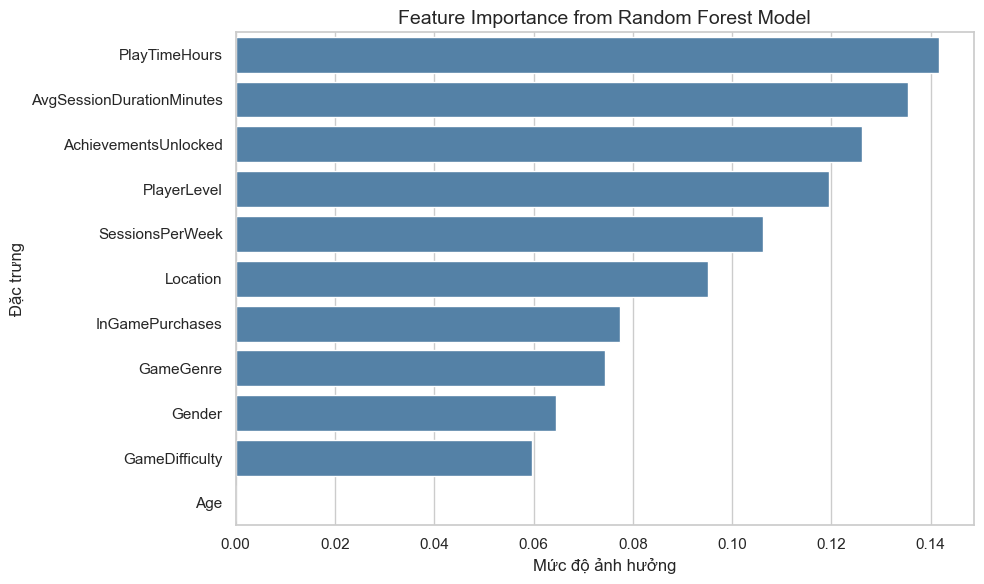

In [41]:
# Tr·ª±c quan h√≥a ƒë·ªô quan tr·ªçng c·ªßa c√°c ƒë·∫∑c tr∆∞ng (feature importance)
import matplotlib.pyplot as plt
import seaborn as sns

# L·∫•y ƒë·ªô quan tr·ªçng t·ª´ m√¥ h√¨nh
importances = model.feature_importances_
feature_names = X.columns

# T·∫°o DataFrame ƒë·ªÉ tr·ª±c quan
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_df, color='steelblue')  # d√πng color thay v√¨ palette tr√°nh warning
plt.title("Feature Importance from Random Forest Model", fontsize=14)
plt.xlabel("M·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng", fontsize=12)
plt.ylabel("ƒê·∫∑c tr∆∞ng", fontsize=12)
plt.tight_layout()
plt.show()
